### STEP 1: IMPORTING ALL THE NECESARY LIBRARIES:

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


### STEP 2: SETTING UP THE DATASET PATHS AND DIRECTORIES: 


In [2]:
# Set the path to the dataset
dataset_path = "C:/Users/uday8/Documents/SEM_5/RM/Dataset"

# Define the training and testing directories
train_dir = os.path.join(dataset_path, "C:/Users/uday8/Documents/SEM_5/RM/Dataset/Training")
test_dir = os.path.join(dataset_path, "C:/Users/uday8/Documents/SEM_5/RM/Dataset/Testing")

# Define the categories
categories = ["glioma", "meningioma", "notumor", "pituitary"]


### STEP 3: LOADING AND PREPROCESSING THE DATASET: 

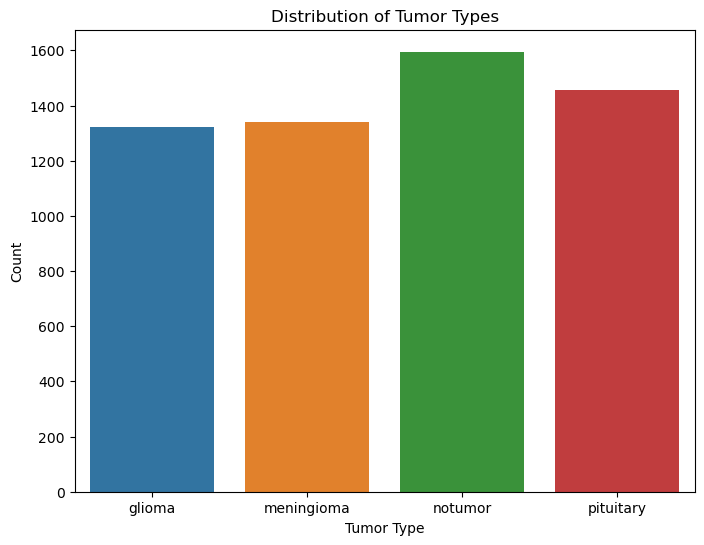

In [3]:
# Load and preprocess the dataset
train_data = []
for category in categories:
    folder_path = os.path.join(train_dir, category)
    images = os.listdir(folder_path)
    count = len(images)
    train_data.append(pd.DataFrame({"Image": images, "Category": [category] * count, "Count": [count] * count}))

train_df = pd.concat(train_data, ignore_index=True)

# Visualize the distribution of tumor types in the training dataset
plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x="Category", y="Count")
plt.title("Distribution of Tumor Types")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.show()


### STEP 4: VISUALIZING IMAGES FOR EACH TUMOR TYPES: 

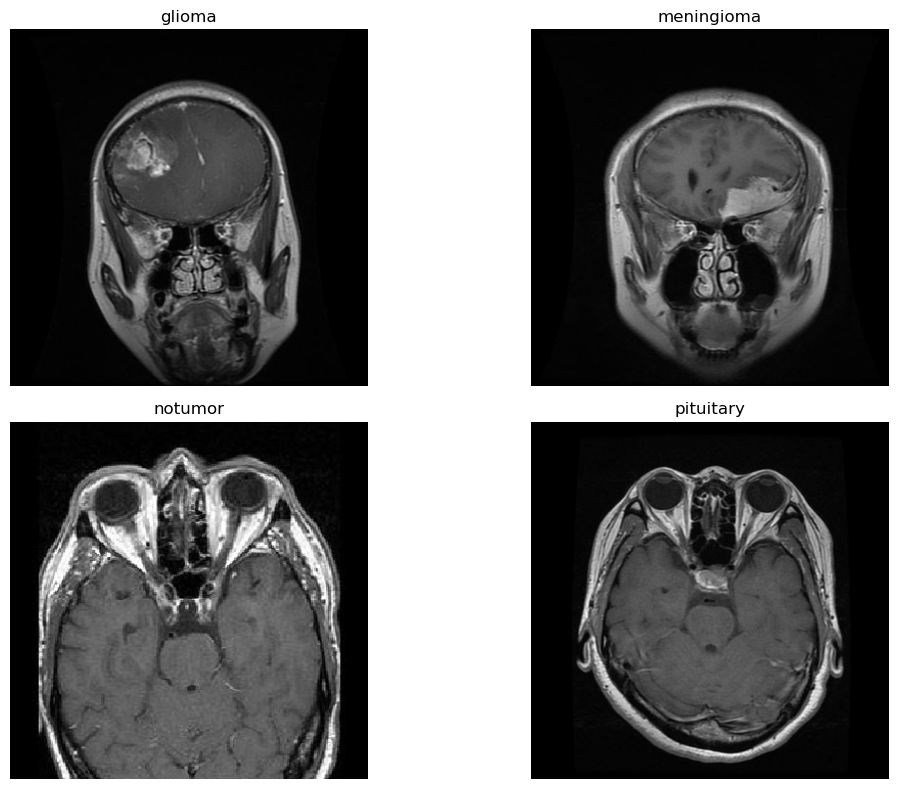

In [4]:
# Visualize sample images for each tumor type
plt.figure(figsize=(12, 8))
for i, category in enumerate(categories):
    folder_path = os.path.join(train_dir, category)
    image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    img = plt.imread(image_path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")
plt.tight_layout()
plt.show()

### STEP 5: SETTING UP IMAGE SIZE ,BATCH SIZE, AND EPOCHES:

In [5]:
# Set the image size
image_size = (150, 150)

# Set the batch size for training
batch_size = 32

# Set the number of epochs for training
epochs = 30

### STEP 6: DATA AUGMENTATION AND PREPROCESSING:

In [6]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


### STEP 7: BUILDING THE MODEL ARTITECHURE

In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3

num_classes = len(categories)

#InceptionV3 architecture
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

model = Sequential([
    base_model,
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_2 (Dense)             (None, 1024)              18875392  
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 40,682,276
Trainable params: 40,647,844
Non-trainable params: 34,432
_________________________________________________________________


In [9]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/30
178/178 [==============================] - 417s 2s/step - loss: 1.0847 - accuracy: 0.7431 - val_loss: 81.9710 - val_accuracy: 0.2367
Epoch 2/30
178/178 [==============================] - 329s 2s/step - loss: 0.3592 - accuracy: 0.8805 - val_loss: 1.1786 - val_accuracy: 0.6758
Epoch 3/30
178/178 [==============================] - 328s 2s/step - loss: 0.2889 - accuracy: 0.9025 - val_loss: 0.6727 - val_accuracy: 0.8602
Epoch 4/30
178/178 [==============================] - 410s 2s/step - loss: 0.2213 - accuracy: 0.9299 - val_loss: 0.4294 - val_accuracy: 0.8641
Epoch 5/30
178/178 [==============================] - 310s 2s/step - loss: 0.2030 - accuracy: 0.9343 - val_loss: 0.4760 - val_accuracy: 0.9359
Epoch 6/30
178/178 [==============================] - 305s 2s/step - loss: 0.1751 - accuracy: 0.9415 - val_loss: 0.5548 - val_accuracy: 0.8516
Epoch 7/30
178/178 [==============================] - 300s 2s/step - loss: 0.1631 - accuracy: 0.9437 - val_loss: 4.5708 - val_accuracy: 0.690

### STEP 8: VISUALIZATION THROUGH GRAPH

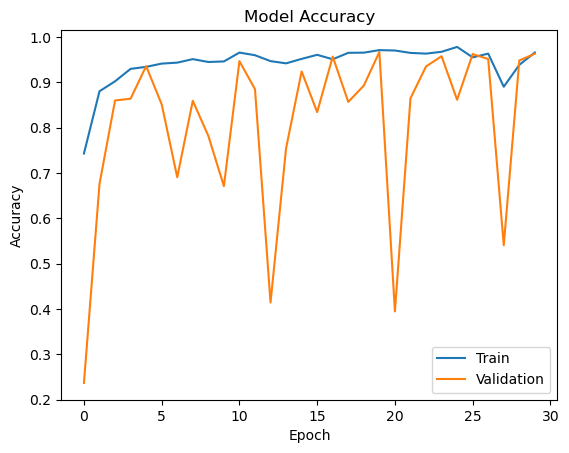

In [10]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

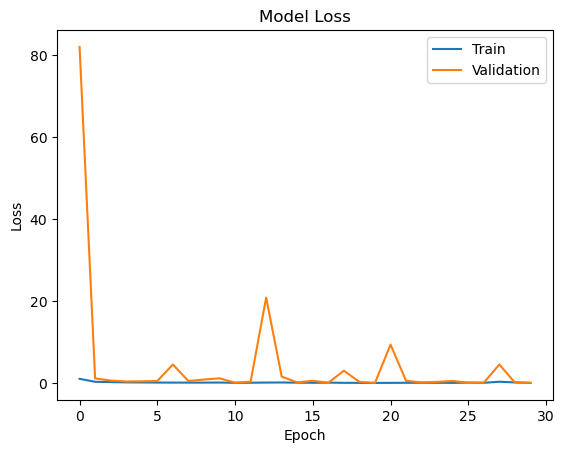

In [11]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

### STEP 9: EVALUATION

In [12]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

40/40 [==============================] - 13s 328ms/step - loss: 0.1104 - accuracy: 0.9633
Test Loss: 0.11042855679988861
Test Accuracy: 0.9632812738418579


### STEP 10: CONFUSION MATRIX AND EXPLANATION:

41/41 [==============================] - 17s 347ms/step


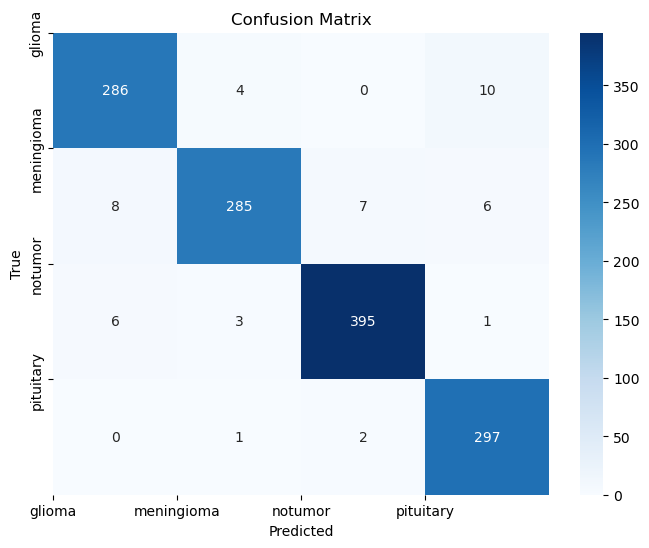

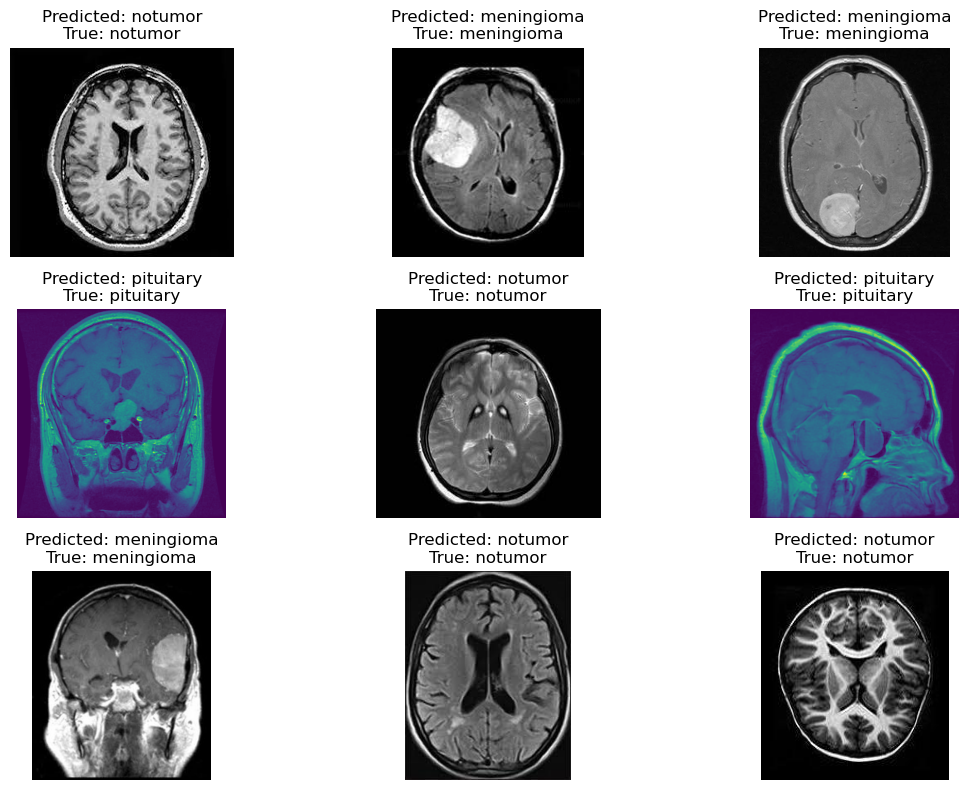

In [13]:
# Make predictions on the test dataset
predictions = model.predict(test_generator)
predicted_categories = np.argmax(predictions, axis=1)
true_categories = test_generator.classes

# Create a confusion matrix
confusion_matrix = tf.math.confusion_matrix(true_categories, predicted_categories)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(categories)), labels=categories)
plt.yticks(ticks=np.arange(len(categories)), labels=categories)
plt.show()

# Plot sample images with their predicted and true labels
test_images = test_generator.filenames
sample_indices = np.random.choice(range(len(test_images)), size=9, replace=False)
sample_images = [test_images[i] for i in sample_indices]
sample_predictions = [categories[predicted_categories[i]] for i in sample_indices]
sample_true_labels = [categories[true_categories[i]] for i in sample_indices]

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


Class: glioma
Precision: 0.9533333333333334
Recall: 0.9533333333333334
F1-Score: 0.9533333333333334

Class: meningioma
Precision: 0.9726962457337884
Recall: 0.9313725490196079
F1-Score: 0.9515859766277128

Class: notumor
Precision: 0.9777227722772277
Recall: 0.9753086419753086
F1-Score: 0.9765142150803461

Class: pituitary
Precision: 0.945859872611465
Recall: 0.99
F1-Score: 0.9674267100977199



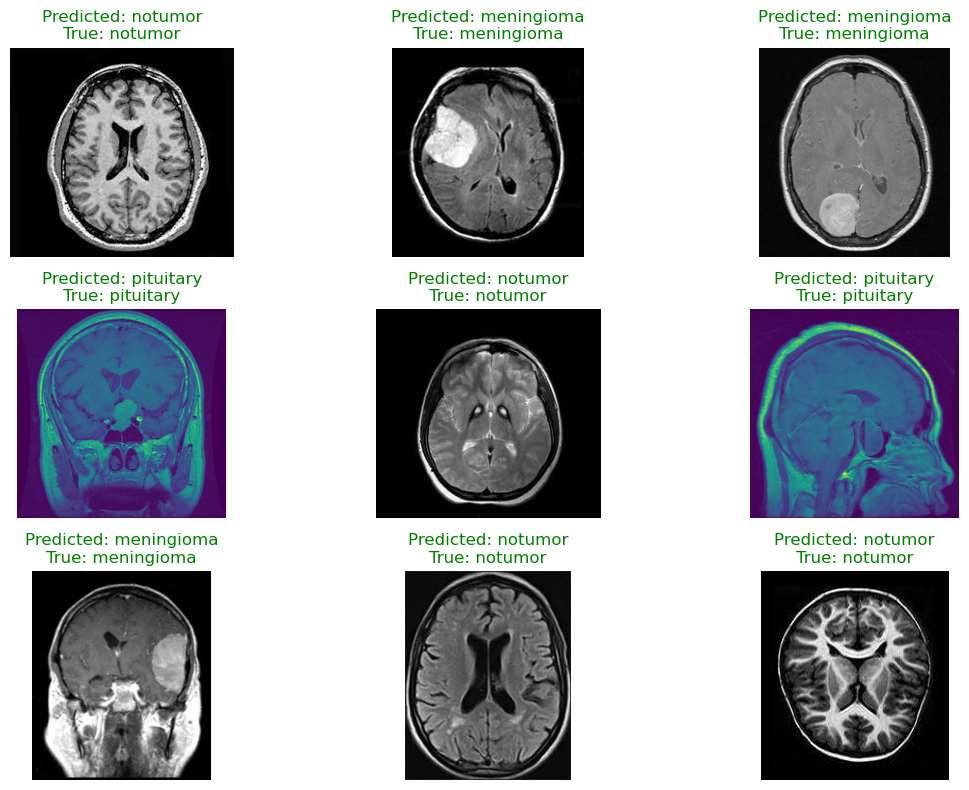

In [14]:
# Calculate precision, recall, and F1-score from the confusion matrix
precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print precision, recall, and F1-score for each class
for i, category in enumerate(categories):
    print(f"Class: {category}")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1-Score: {f1_score[i]}")
    print()

# Analyze the sample images and their predictions
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    if sample_predictions[i] == sample_true_labels[i]:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='green')
    else:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='red')
    plt.axis("off")
plt.tight_layout()
plt.show()

In [15]:
from sklearn.metrics import classification_report

# Calculate precision, recall, accuracy, and F1 score
report = classification_report(true_categories, predicted_categories, target_names=categories)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      glioma       0.95      0.95      0.95       300
  meningioma       0.97      0.93      0.95       306
     notumor       0.98      0.98      0.98       405
   pituitary       0.95      0.99      0.97       300

    accuracy                           0.96      1311
   macro avg       0.96      0.96      0.96      1311
weighted avg       0.96      0.96      0.96      1311



In [16]:
# Save the trained model
model.save("brain_tumor_InceptionNet.h5")
